## Phase 4

## Unsupervised ML Clustering

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
df_IPC = pd.read_csv(r"C:\Users\skabd\Downloads\India_Crime\01_District_wise_crimes_committed_IPC_2001_2012.csv")
df_IPC

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


We have loaded the dataset, now let's do some analysis.

In [3]:
df_IPC.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

The above are the column names present in the dataset.

In [4]:
#Let's check for States
df_IPC['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

The above are the names of different States and UTs of India.

In [5]:
df_IPC = df_IPC[df_IPC['DISTRICT']!='TOTAL']      #Here we are excluding the row 'TOTAL'

We will need STATE/UT, DISTRICT, YEAR and TOTAL IPC CRIMES to create a dataframe.

In [6]:
#Let's create a dataframe
df_ipc = df_IPC[['STATE/UT', 'DISTRICT', 'YEAR', 'TOTAL IPC CRIMES']]
df_ipc

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,4125
2,ANDHRA PRADESH,CHITTOOR,2001,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507
...,...,...,...,...
9010,DELHI UT,STF,2012,6
9011,DELHI UT,WEST,2012,5558
9012,LAKSHADWEEP,LAKSHADWEEP,2012,60
9014,PUDUCHERRY,KARAIKAL,2012,787


The above dataframe shows the columns STATE/UT, DISTRICT, YEAR and TOTAL IPC CRIMES.

In [7]:
#Let's load another dataset for SC
df_SC = pd.read_csv(r"C:\Users\skabd\Downloads\India_Crime\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")
df_SC

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,1,0,0,0,0,0,0,1,20,1


We have loaded the dataset for crimes against SC.

In [8]:
df_SC.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'],
      dtype='object')

In [9]:
df_SC = df_SC[df_SC['DISTRICT']!='TOTAL']

In [10]:
df_SC['TOTAL CRIMES AGAINST SC']=df_SC.iloc[:,3:].sum(axis=1)

In [11]:
#Creating dataframe
df_sc = df_SC[['STATE/UT', 'DISTRICT', 'Year', 'TOTAL CRIMES AGAINST SC']]
df_sc

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST SC
0,ANDHRA PRADESH,ADILABAD,2001,55
1,ANDHRA PRADESH,ANANTAPUR,2001,127
2,ANDHRA PRADESH,CHITTOOR,2001,114
3,ANDHRA PRADESH,CUDDAPAH,2001,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,89
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,2
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,1


The above dataset shows State/UT, district, year and total crimes against SC.

In [12]:
#Loading dataset for ST
df_ST = pd.read_csv(r"C:\Users\skabd\Downloads\India_Crime\02_District_wise_crimes_committed_against_ST_2001_2012.csv")
df_ST

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0,0,0,0,0,0,0,0,0,0


In [13]:
df_ST = df_ST[df_ST['DISTRICT']!='TOTAL']

In [14]:
df_ST['TOTAL CRIMES AGAINST ST']=df_ST.iloc[:,3:].sum(axis=1)

In [15]:
#Creating dataframe
df_st = df_ST[['STATE/UT', 'DISTRICT', 'Year', 'TOTAL CRIMES AGAINST ST']]
df_st

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST ST
0,ANDHRA PRADESH,ADILABAD,2001,18
1,ANDHRA PRADESH,ANANTAPUR,2001,14
2,ANDHRA PRADESH,CHITTOOR,2001,2
3,ANDHRA PRADESH,CUDDAPAH,2001,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,14
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,0


The above dataset shows state/UT, district, year and total crimes against ST.

In [16]:
#Loading dataset for crimes against children
df_Child = pd.read_csv(r"C:\Users\skabd\Downloads\India_Crime\03_District_wise_crimes_committed_against_children_2001_2012.csv")
df_Child

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9011,LAKSHADWEEP,TOTAL,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9012,PUDUCHERRY,KARAIKAL,2012,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7
9013,PUDUCHERRY,PUDUCHERRY,2012,0.0,4.0,16.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,25


In [17]:
df_Child = df_Child[df_Child['DISTRICT']!='TOTAL']

In [18]:
#Renaming the "Total" column
df_Child.rename(columns={"Total":"TOTAL CRIMES AGAINST CHILDREN"}, inplace=True)

In [19]:
#Creating dataframe
df_children = df_Child[['STATE/UT', 'DISTRICT', 'Year', 'TOTAL CRIMES AGAINST CHILDREN']]
df_children

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,0
1,ANDHRA PRADESH,ANANTAPUR,2001,66
2,ANDHRA PRADESH,CHITTOOR,2001,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0
...,...,...,...,...
9007,DELHI,STF,2012,0
9008,DELHI,WEST,2012,542
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0
9012,PUDUCHERRY,KARAIKAL,2012,7


The above dataset shows state/UT, district, year and total crimes against children.

In [20]:
#Loading dataset for crimes against women
df_Women = pd.read_csv(r"C:\Users\skabd\Downloads\India_Crime\42_District_wise_crimes_committed_against_women_2001_2012.csv")
df_Women

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [21]:
df_Women = df_Women[df_Women['DISTRICT']!= 'TOTAL']

In [22]:
df_Women['TOTAL CRIMES AGAINST WOMEN'] = df_Women.iloc[:,3:].sum(axis=1)

In [23]:
#Creating dataframe
df_women = df_Women[['STATE/UT', 'DISTRICT', 'Year', 'TOTAL CRIMES AGAINST WOMEN']]
df_women

,STATE/UT,DISTRICT,Year,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,454
1,ANDHRA PRADESH,ANANTAPUR,2001,356
2,ANDHRA PRADESH,CHITTOOR,2001,456
3,ANDHRA PRADESH,CUDDAPAH,2001,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,475
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,739
9012,LAKSHADWEEP,LAKSHADWEEP,2012,2
9014,PUDUCHERRY,KARAIKAL,2012,11


The above dataset shows state/UT, district, year and total crimes against women.

### Merging the datasets

In [24]:
#Merging all the datasets that we have created above
cluster = pd.merge(df_ipc, df_sc, how='inner', left_on=['STATE/UT','DISTRICT','YEAR'], right_on=['STATE/UT','DISTRICT','Year']).merge(df_st, how='inner', left_on=['STATE/UT','DISTRICT','Year'], right_on=['STATE/UT','DISTRICT','Year']).merge(df_children, how='inner', left_on=['STATE/UT','DISTRICT','Year'], right_on=['STATE/UT','DISTRICT','Year']).merge(df_women, how='inner', left_on=['STATE/UT','DISTRICT','Year'] ,right_on=['STATE/UT','DISTRICT','Year'])
cluster

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,Year,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,4154,2001,55,18,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,4125,2001,127,14,66,356
2,ANDHRA PRADESH,CHITTOOR,2001,5818,2001,114,2,0,456
3,ANDHRA PRADESH,CUDDAPAH,2001,3140,2001,100,4,0,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,6507,2001,89,14,0,475
...,...,...,...,...,...,...,...,...,...
8404,DAMAN & DIU,DAMAN,2012,202,2012,0,0,7,6
8405,DAMAN & DIU,DIU,2012,37,2012,0,0,1,2
8406,LAKSHADWEEP,LAKSHADWEEP,2012,60,2012,0,0,0,2
8407,PUDUCHERRY,KARAIKAL,2012,787,2012,1,0,7,11


We have merged all our datasets. Let's move ahead.

### Let's create groups and sum all the crimes over the years

From the above dataframe we can see that there are two columns for Years. Let's drop one.

In [25]:
cluster = cluster.groupby(['STATE/UT', 'DISTRICT']).sum().reset_index().drop(['Year'], axis=1)
cluster

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,2007,807,0,1,10,54
1,A & N ISLANDS,ANDAMAN,20059,7377,0,33,206,458
2,A & N ISLANDS,CAR,2012,24,0,0,2,2
3,A & N ISLANDS,NICOBAR,20059,235,0,3,1,11
4,A & N ISLANDS,NORTH,2012,115,0,0,7,9
...,...,...,...,...,...,...,...,...
796,WEST BENGAL,PURULIA,24078,16958,8,9,8,3180
797,WEST BENGAL,SEALDAH G.R.P.,24078,4746,0,0,2,134
798,WEST BENGAL,SILIGURI G.R.P.,24078,1760,0,1,7,61
799,WEST BENGAL,SILIGURI_PC,2012,3023,0,8,44,552


Now we have dropped the extra column. Let's proceed ahead.

### 4.1 Creating Clusters

In [26]:
x = cluster.iloc[:,2:]
x

,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,2007,807,0,1,10,54
1,20059,7377,0,33,206,458
2,2012,24,0,0,2,2
3,20059,235,0,3,1,11
4,2012,115,0,0,7,9
...,...,...,...,...,...,...
796,24078,16958,8,9,8,3180
797,24078,4746,0,0,2,134
798,24078,1760,0,1,7,61
799,2012,3023,0,8,44,552


In [27]:
#Clustering using KMeans cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(x)

We will create 3 clusters, i.e., one for Peaceful areas, one for Moderate areas and another one for Sensitive areas.

### 4.2  Create DataFrame for each cluster that shows data according to the areas.

### Peaceful Areas

In [28]:
peaceful_areas = cluster[y_kmeans==1]
peaceful_areas

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,2007,807,0,1,10,54
1,A & N ISLANDS,ANDAMAN,20059,7377,0,33,206,458
2,A & N ISLANDS,CAR,2012,24,0,0,2,2
3,A & N ISLANDS,NICOBAR,20059,235,0,3,1,11
4,A & N ISLANDS,NORTH,2012,115,0,0,7,9
...,...,...,...,...,...,...,...,...
796,WEST BENGAL,PURULIA,24078,16958,8,9,8,3180
797,WEST BENGAL,SEALDAH G.R.P.,24078,4746,0,0,2,134
798,WEST BENGAL,SILIGURI G.R.P.,24078,1760,0,1,7,61
799,WEST BENGAL,SILIGURI_PC,2012,3023,0,8,44,552


The above dataframe shows the peaceful areas where less crime has happened over the years 2001-2012.

### Moderate Areas

In [29]:
moderate_areas = cluster[y_kmeans==0]
moderate_areas

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
6,ANDHRA PRADESH,ADILABAD,24078,61959,686,269,269,8583
7,ANDHRA PRADESH,ANANTAPUR,24078,59927,1569,371,402,5287
8,ANDHRA PRADESH,CHITTOOR,24078,75471,1393,14,345,8004
9,ANDHRA PRADESH,CUDDAPAH,24078,58147,1537,128,574,5002
11,ANDHRA PRADESH,EAST GODAVARI,24078,93193,2042,223,213,9514
...,...,...,...,...,...,...,...,...
790,WEST BENGAL,MALDA,24078,35343,6,15,237,7811
792,WEST BENGAL,MURSHIDABAD,24078,85689,13,13,923,27004
793,WEST BENGAL,NADIA,24078,79313,0,1,94,17582
794,WEST BENGAL,PASCHIM MIDNAPUR,22077,38981,6,11,29,7875


The above dataframe shows the moderate areas where moderate crimes have happened over the years 2001-2012.

### Sensitive Areas

In [30]:
sensitive_areas = cluster[y_kmeans==2]
sensitive_areas

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
10,ANDHRA PRADESH,CYBERABAD,20075,141743,1657,341,296,15411
15,ANDHRA PRADESH,HYDERABAD CITY,24078,202931,1293,76,872,19685
121,BIHAR,PATNA,24078,147542,1503,33,893,5931
168,GUJARAT,AHMEDABAD COMMR.,24078,218005,798,41,1435,14973
304,KARNATAKA,BANGALORE COMMR.,24078,350347,1423,16,675,9010
342,KERALA,ERNAKULAM RURAL,18072,114393,299,14,269,3072
372,MADHYA PRADESH,BHOPAL,24078,169575,1565,226,1326,7087
383,MADHYA PRADESH,GWALIOR,24078,111206,2310,595,1582,5760
386,MADHYA PRADESH,INDORE,24078,204398,1139,421,4401,10392
388,MADHYA PRADESH,JABALPUR,24078,119446,952,649,1203,7855


The above dataframe shows the areas with high crimes or the most sensitive areas where extreme amount of crimes have happened over the years 2001-2012.

### 4.3  "Analyse your clusters and prepare a report that explains all your observations.

### Most peaceful areas

In [31]:
peaceful_areas['OVERALL CRIME'] = peaceful_areas.iloc[:,2:].sum(axis=1)

peaceful_areas.sort_values(by='OVERALL CRIME', ascending=True, inplace=True)

In [32]:
peaceful_areas.head().reset_index().drop(['index'], axis=1)

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,JAMMU & KASHMIR,RAILWAYS KATRA,2012,2,0,0,0,0,2014
1,TRIPURA,G.R.P.,2010,6,0,0,0,1,2017
2,JAMMU & KASHMIR,RAILWAYS KMR,2009,10,0,0,0,2,2021
3,ASSAM,BIEO,2012,16,0,0,0,0,2028
4,A & N ISLANDS,CAR,2012,24,0,0,2,2,2040


We can see that the peaceful areas have much more lesser crimes as compared to most sensitive areas. Hence, we can say that these are the most safe states or areas.

### Most sensitive areas

In [33]:
sensitive_areas['OVERALL CRIME'] = sensitive_areas.iloc[:,2:].sum(axis=1)

In [34]:
sensitive_areas.sort_values(by='OVERALL CRIME', ascending=True, inplace=True)

In [35]:
sensitive_areas.head().reset_index().drop(['index'], axis=1)

,STATE/UT,DISTRICT,YEAR,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN,OVERALL CRIME
0,KERALA,ERNAKULAM RURAL,18072,114393,299,14,269,3072,136119
1,MADHYA PRADESH,GWALIOR,24078,111206,2310,595,1582,5760,145531
2,MADHYA PRADESH,JABALPUR,24078,119446,952,649,1203,7855,154183
3,MAHARASHTRA,MUMBAI,10015,141815,67,2,1021,4251,157171
4,UTTAR PRADESH,LUCKNOW,24078,118377,2482,22,1251,12679,158889


We can see how extreme the number of crimes are in these sensitive areas. Hence, we can say that these are the most unsafe states or areas.

### 1. What is impacting more crimes in sensitive areas. 

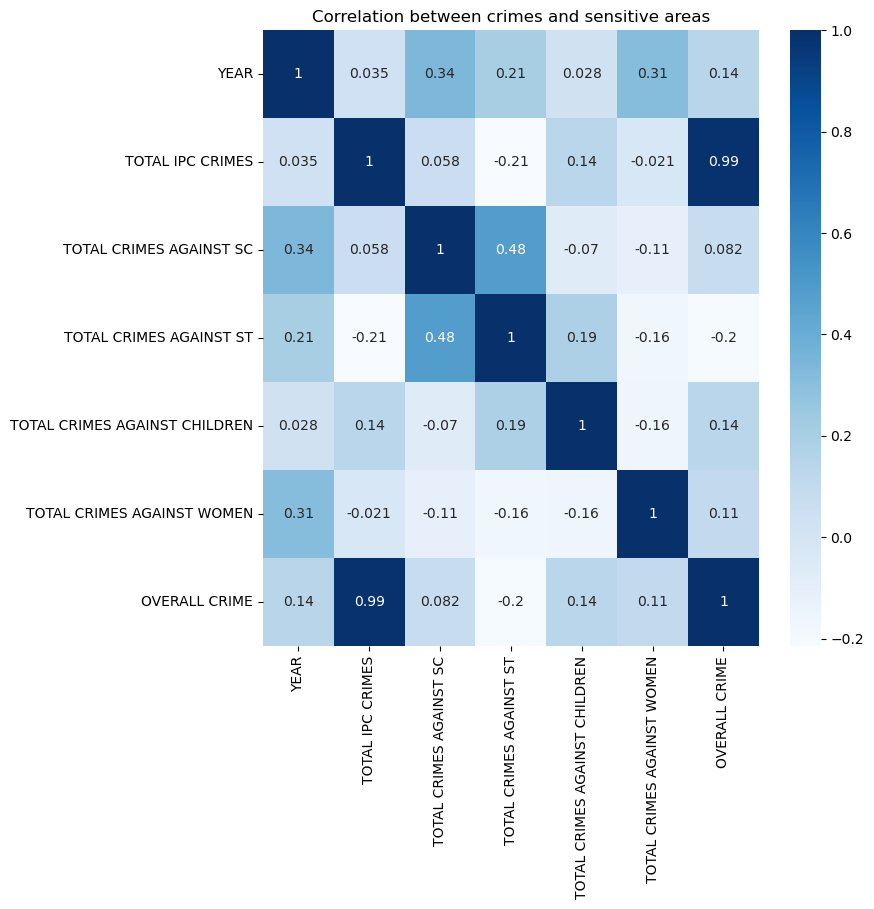

In [36]:
#Let's plot a correlation graph / heatmap for the above question.
plt.figure(figsize=(8,8))
sns.heatmap(sensitive_areas.iloc[:,2:].corr(), annot=True, cmap="Blues")
plt.title("Correlation between crimes and sensitive areas")
plt.show()

From the above heatmap we can see that there is 99% positive correlation between OVERALL CRIME AND TOTAL IPC CRIMES, 48% positive correlation between TOTAL CRIMES AGAINST ST AND TOTAL CRIMES AGAINST SC in the overall sensitive areas.

Here, with all our analysis we can conclude that illiteracy, poverty and unemployment are the main factors that impact the crimes in the sensitive areas. As the sensitive areas consist of Karnataka, Gujarat, Bihar, Andhra Pradesh, West Bengal, Uttar Pradesh, Madhya Pradesh and Kerala, among which there are some states with high literacy rates like Kerala, some are with low literacy rates like Bihar while some are with moderate literacy rates like Gujarat and some have rapid population growth. So due to the lack of proper education and over population they remain unemployed as well as suffer from poverty and can't afford to satisfy their needs and as a result they commit crimes.

### 2. What needs to be done to reduce crime. 

Well, with our analysis we noticed that the states or districts with high literacy rates or low literacy rates, high population or low population rates and unemployment play the vital role in the overall crimes committed by the individuals. So to reduce it we need to provide improved surveillance around homes and business or public places, which are likely to be crime prone areas. 
- We should change our habits of being angry or frustrated by setting certains rules. 
- We should post proper signages in those locations to prevent criminals to commit any crime. 
- Proper education should be given to everyone so that they can learn something about being social and not harm others by committing such crimes. 
- The government needs to play a vital role here. It should restore the faith of the public in order to provide justice among all.
- The government should look out for illegal activities like drugs or smuggling which leads to more crimes.
- The government should organize youth awareness camps in order to promote a crime free tomorrow.

- Every area should be provided with police surveillance to instigate the people from committing any crime in public places. It creates fear in the criminals minds and that the police have an eye on them. And if a crime is committed under surveillance the police will have benefit of getting the evidence of the site which will make it easy for them to investigate.
- The government should keep an eye on the youths to prevent them from being affected by drug addiction and also should track down the ones behind it. 
- The government should organize regular counselling sessions for the poor and backward classes to rebuild their faith in laws and orders and not act upon themselves to get justice. 
- The government should encourage in the develpoment of offender tracking systems in India so that it can help track down the prisoners or previously prosecuted criminals who are about to commit crime.
- The government should encourage crime analysis systems in order to disclose the pattern about where and how the crime is about to occur and what will be the next move of a possible criminal. 
- The usage of crime mapping and geocoding should be known by all the police departments, especially in the areas with large populations.
- Government leadership plays an essential role in development of effective crime prevention strategies. 
- Socio-economic development and promotion of economic policies like education, employment and health, etc., should be encouraged in order to prevent unemployment and frustration among the individuals. 
- Strategies, policies, and actions for crime prevention should be based on pre-gained and far-reaching knowledge about crime, its problems, and causes.
- Corrective prevention is a type of prevention that is based on an assumption that criminal behavior is an outcome of certain factors just as human behavior and this behavior causes a person to do criminal activity. The word prevention itself means the removal of the factors and causes that lead to criminal behavior. Corrective prevention can be undertaken for a specific situation where criminal behavior is anticipated or it can be taken as a general precaution in the interest of the whole society.


### 3. Most safe and unsafe districts.

#### Most safe states

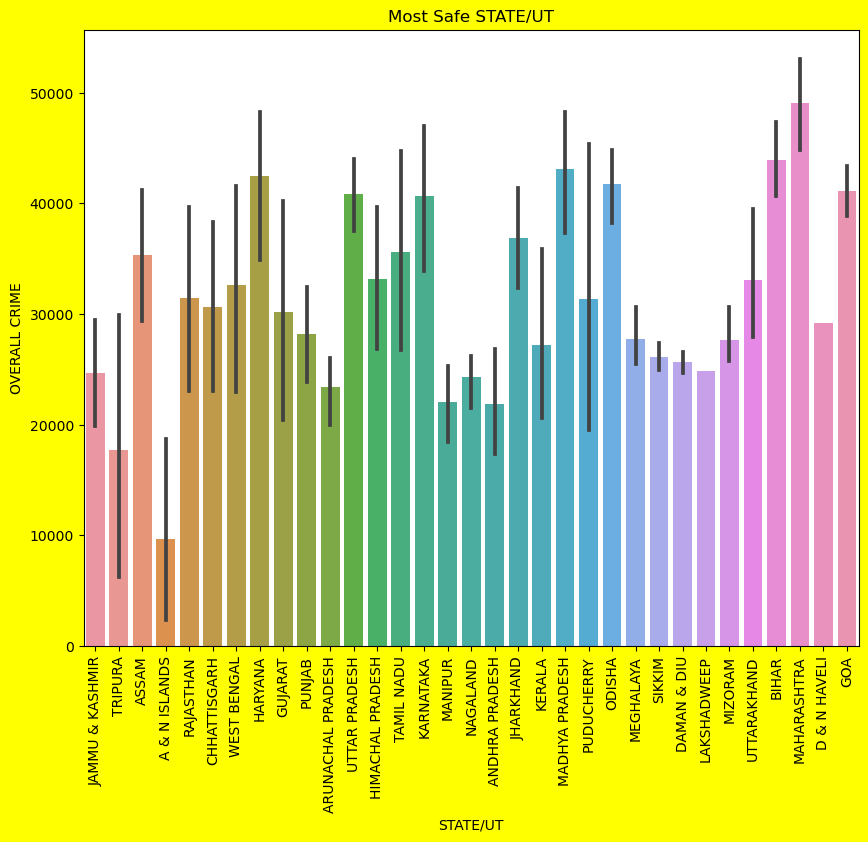

In [37]:
#Plotting for most safe states/UTs
plt.figure(figsize=(10,8), facecolor='Yellow')
sns.barplot(x=peaceful_areas['STATE/UT'], y=peaceful_areas['OVERALL CRIME'])
plt.xlabel('STATE/UT')
plt.title('Most Safe STATE/UT')
plt.xticks(rotation=90)
plt.show()

From the above plot we can see that A & N Island is the most safe UT followed by Tripura, Arunachal Pradesh, Manipur, Jharkhand, Nagaland and Lakshadweep, which are mostly safe.

#### Most safe districts

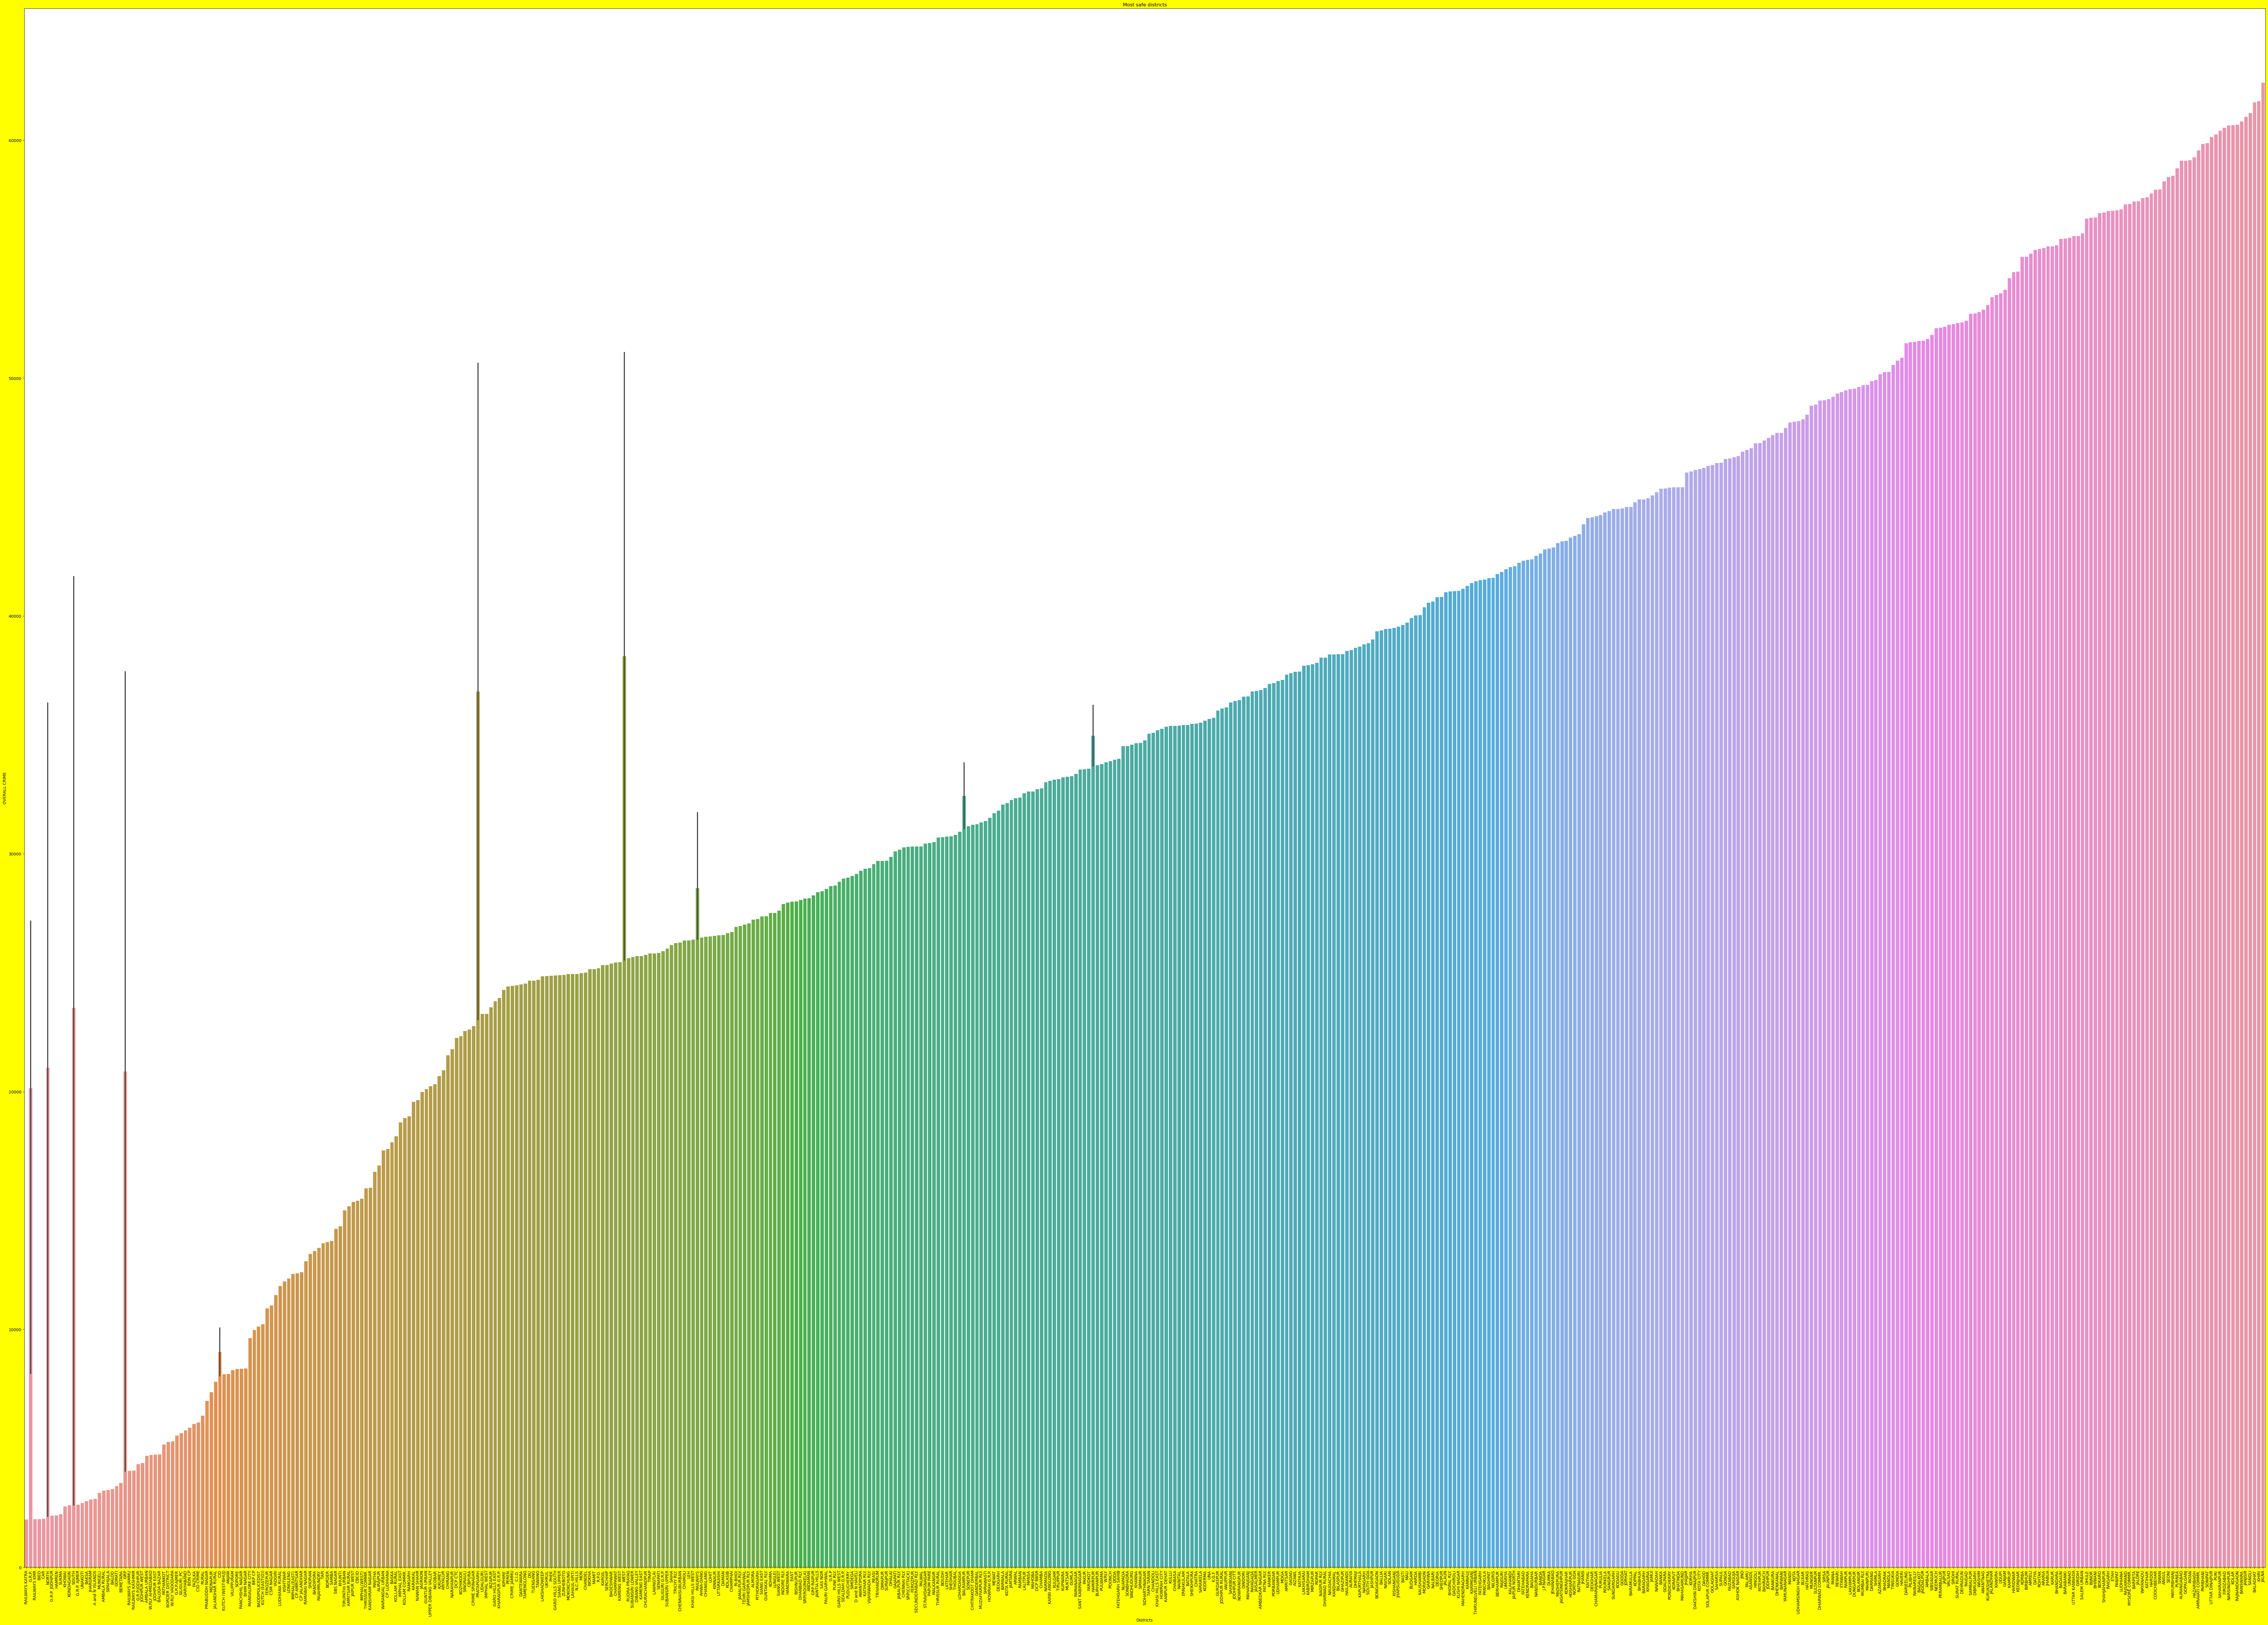

In [41]:
#Plotting for most safe districts
plt.figure(figsize=(100,70), facecolor='Yellow')
sns.barplot(x=peaceful_areas['DISTRICT'], y=peaceful_areas['OVERALL CRIME'])
plt.xlabel('Districts')
plt.title('Most safe districts')
plt.xticks(rotation=90)
plt.show()

From the above graph we can see various safe districts where less crimes have happened. (Please double tap on the graph to zoom in).

#### Most unsafe states

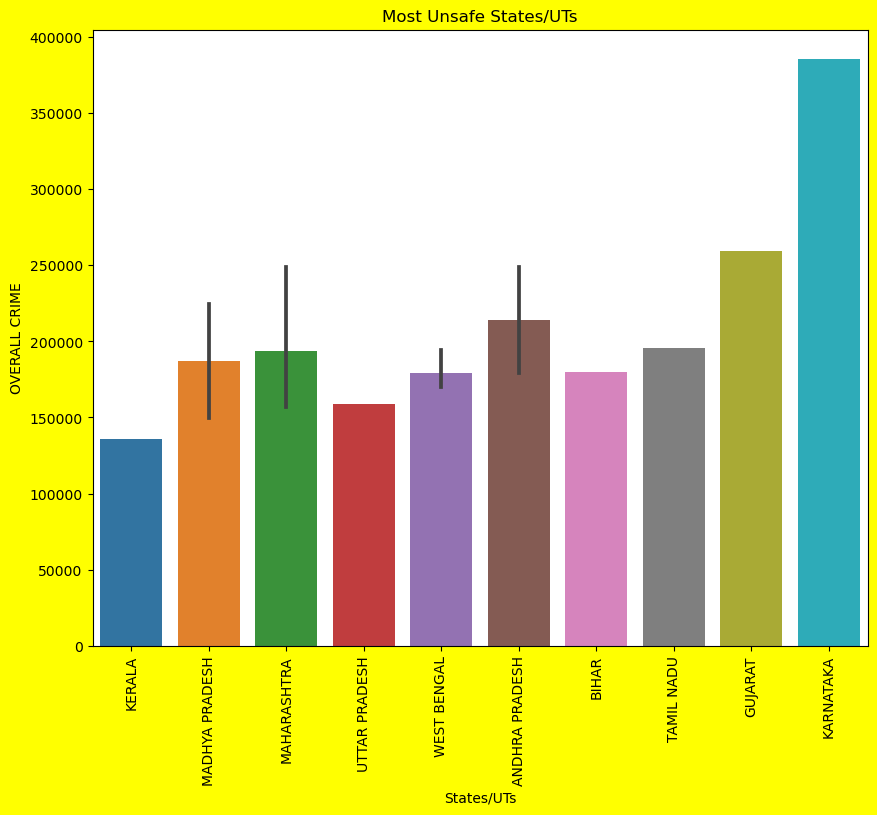

In [42]:
#Plotting graph for most unsafe states
plt.figure(figsize=(10,8), facecolor='Yellow')
sns.barplot(x=sensitive_areas['STATE/UT'], y=sensitive_areas['OVERALL CRIME'])
plt.xlabel('States/UTs')
plt.title('Most Unsafe States/UTs')
plt.xticks(rotation=90)
plt.show()

Here, we can see that Karnataka takes the lead in most unsafe areas or states and Kerala takes the least place.

#### Most unsafe districts

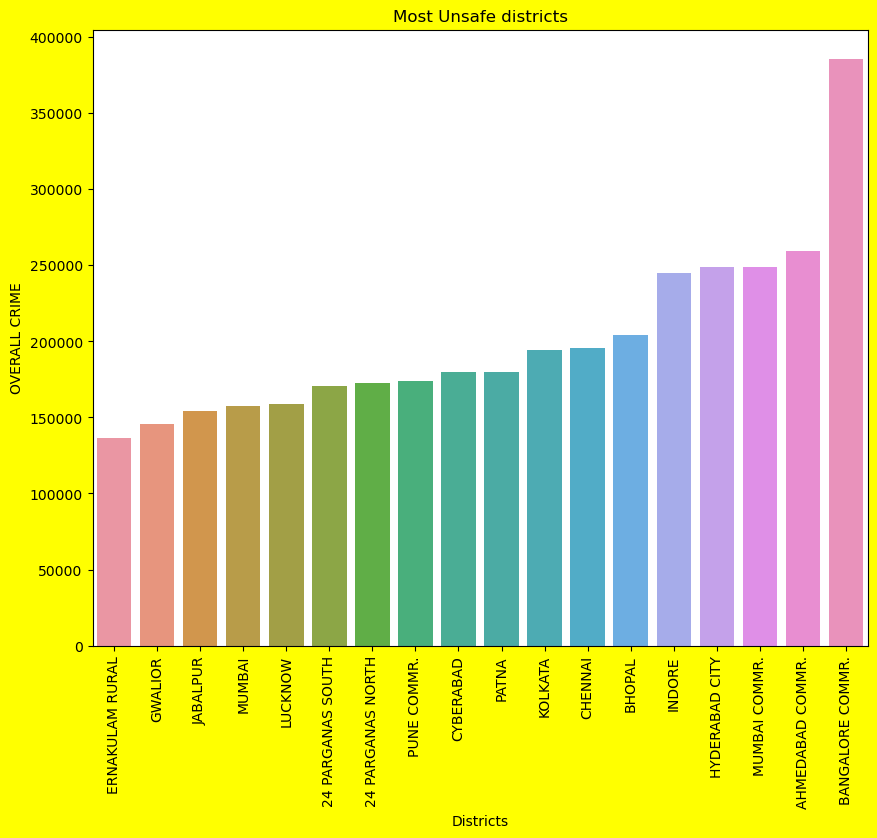

In [43]:
#Plotting for most Unsafe districts
plt.figure(figsize=(10,8), facecolor='Yellow')
sns.barplot(x=sensitive_areas['DISTRICT'], y=sensitive_areas['OVERALL CRIME'])
plt.xlabel('Districts')
plt.title('Most Unsafe districts')
plt.xticks(rotation=90)
plt.show()

From the above plot we can see that Bangalore Commr. is the most unsafe district in terms of crimes. 

### 4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"

In our previous analysis we concluded that with lack of proper education or illiteracy more and more crimes take place. As in Madhya Pradesh and Uttar Pradesh, most of the people remain illiterate and their mindsets are different as compared to literate people, so when any dispute arises they choose the path of violence to settle the matter but the matter becomes more and more unsettled with the emergence of crime.

Delhi, being the one of the most literate UTs, commits most crime even in the broad daylight. Despite being the capital of India, it lies in the first five most criminal states / UTs in India. So, ultimately illiteracy is not the only cause of crimes but the mindsets of people. 

Let us load our collected data to make a clear observation.

In [38]:
#Loading collected dataset
collected_data = pd.read_csv(r"C:\Users\skabd\OneDrive\Documents\crime_area_literacy.csv")
collected_data.head()
#Previously done analysis on this dataset in phase 2

,STATE/UT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total,Area (km2),Average Literacy Rate %,Literacy Rate % (Males),Literacy Rate % (Females),Population
0,ANDHRA PRADESH,2001,35,84,57,0,7,22,12,0,0,6,47,270,"1,62,975",61.11,70.85,51.17,"7,57,28,400"
1,ARUNACHAL PRADESH,2001,0,0,0,0,0,0,0,0,0,0,0,0,"83,743",54.74,64.07,44.24,"10,98,328"
2,ASSAM,2001,0,0,18,0,0,0,0,0,0,0,0,18,"78,438",64.28,71.93,56.03,"2,66,38,600"
3,BIHAR,2001,2,16,26,0,0,1,16,1,1,2,18,83,"94,163",47.53,60.32,33.57,"8,28,79,910"
4,CHHATTISGARH,2001,0,37,13,0,0,5,0,0,0,0,50,105,"1,35,192",65.18,77.86,52.40,"2,08,34,530"


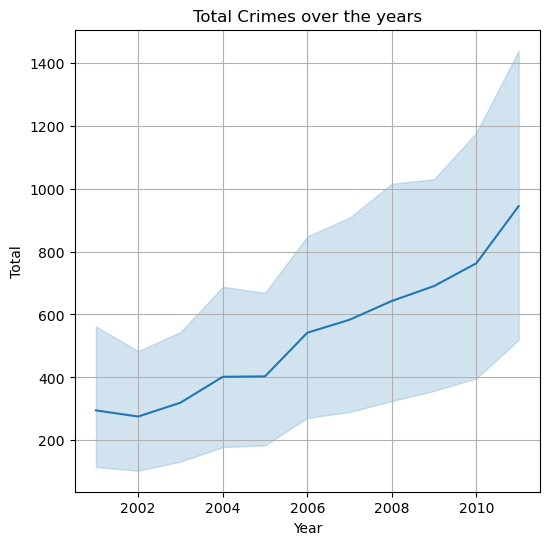

In [39]:
#Let's visualize total crimes over the years.
plt.figure(figsize=(6,6), facecolor='White')
plt.title("Total Crimes over the years")
sns.lineplot(x = "Year", y = "Total", data=collected_data)
plt.grid()
plt.show()

As we can see the crimes increase with the increase in years.

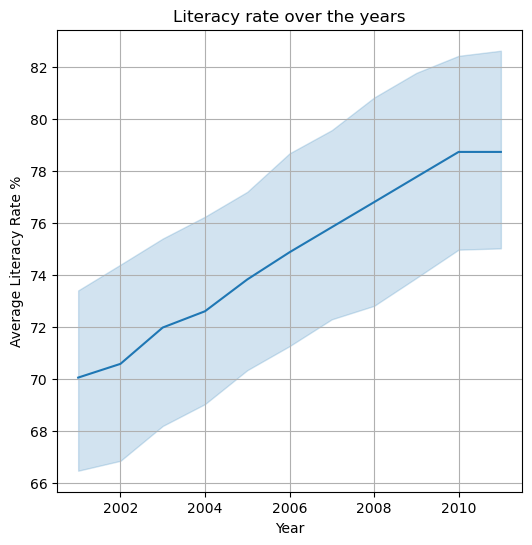

In [40]:
#Let's visualize the literacy rates over the years
plt.figure(figsize=(6,6), facecolor='White')
plt.title("Literacy rate over the years")
sns.lineplot(x = "Year", y = "Average Literacy Rate %", data=collected_data)
plt.grid()
plt.show()

We can see the literacy rate also increases with the increase in years. And ultimately crime also increases with the increase in literacy rates over the years.

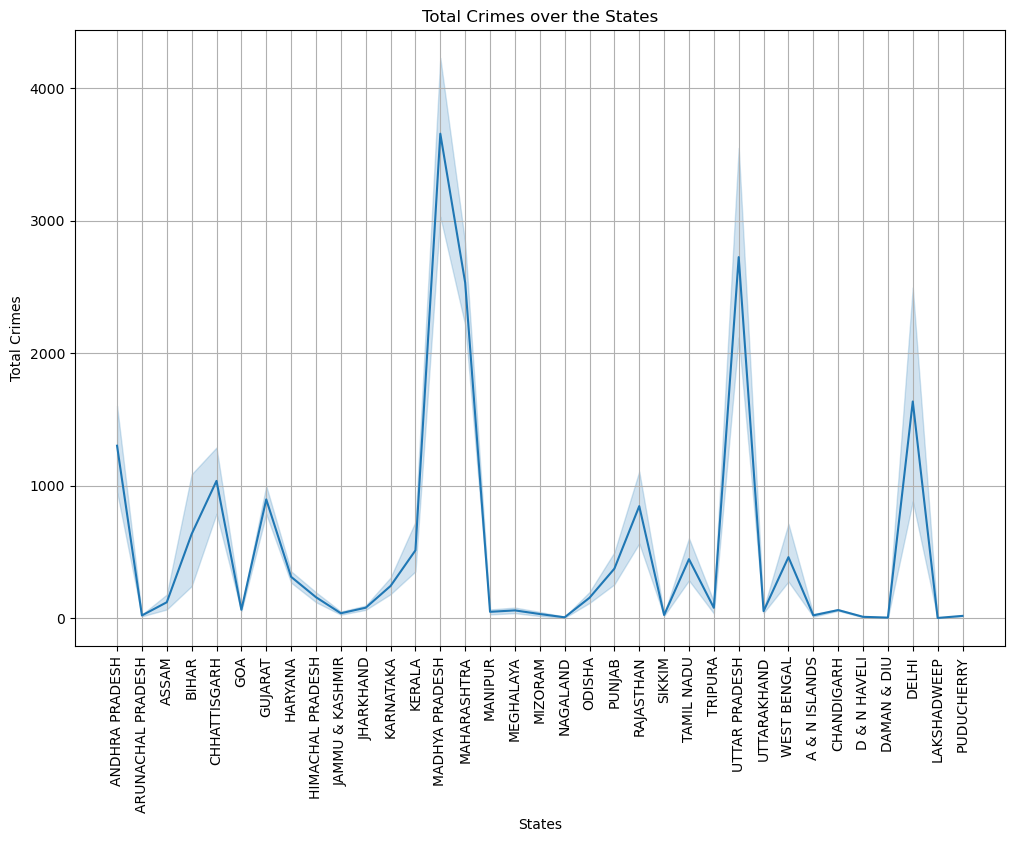

In [43]:
#Let's visualize which state/UT commits more crime 
plt.figure(figsize=(12,8))
sns.lineplot(x = 'STATE/UT', y = 'Total', data=collected_data)
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Total Crimes")
plt.title("Total Crimes over the States")
plt.grid()
plt.show()

Here, we can see that Madhya Pradesh, Maharashtra and Uttar Pradesh are the states and Delhi, the only UT have very high crime rates and Lakshadweep, Puducherry, Nagaland, D & N Haveli, A & N Islands and Arunachal Pradesh have very low crime rates.

This proves that not only literacy rate but also area, population and people play important roles in committing more and more crimes. We have seen the impact of area and population on crimes during the analysis in the Phase 2.

### 4.4   Capstone project overall story in your own words. Min 1000 words.

With rapid urbanization and transformation of small cities and towns into big cities, the crimes are also increasing from time to time. This increment in crimes has been a great threat to the Indian society and an alarm to us all.

In our overall project we analysed various crimes that have occured in the states/UTs over the years 2001-2012. And we concluded many things doing analysis upon them. We saw that the crimes are committed in almost every year and it keeps increasing year by year which is not good for a developing country. According to National Crime Records Bureau, 156 cases of Deaths due to negligence, 100 Murders and 61 Kidnapping & Abduction cases reported each day in the country in 2001. In 2001 the crime rate of India was 4.30% and it decreased to 3.79% in 2011. In the years 2001-2011, total incidence of IPC crime has also gone up from 17,69,308 in 2001 to 23,25,575 in 2011. The decadal growth becomes 31.4% and average annual rate was 3.0%.


During our analysis we saw that crimes against women are rising day by day in India and has become one of the greatest concerns. Crimes like rape, sexual harassment, and domestic violence have become a major issue in India. Here, women do not feel safe travelling alone even in broad daylight. According to NRCB, in 2011, there were more than 228,650 reported incidents of crime against women in India. The reason is lack of proper implementation of laws and lack of proper knowledge of laws. In India the women are not given proper education and right to act on their on own will, especially in rural areas. They are forced to marry at an early age and soon after that be a mother and take care of the household work. The crimes including abandonment, kidnapping, selling and buying of girls for prostitution are rising day by day. 

From our analysis in the Phase 2 we saw that:
- Madhya Pradesh takes the lead in rape cases followed by Maharashtra, Uttar Pradesh, Andhra Pradesh and Chattisgarh, etc., over the years 2001-2011. 
- Uttar Pradesh takes the lead in kidnapping and abduction followed by Delhi, being the capital of India. 
- In matters of female foeticide, Punjab, Rajasthan, Madhya Pradesh and Chhattisgarh take the lead.
- In matters of suicide Maharashtra takes the lead followed by Madhya Pradesh and Andhra Pradesh.
- West Bengal takes the lead in procuration of minor girls.
- Maharashtra takes the lead in buying of girls for prostitution followed by West Bengal.
- West Bengal takes the lead in selling of girls for prostitution.
- Uttar Pradesh takes the lead in murder followed by Maharashtra and Madhya Pradesh.


Apart from this, here comes crimes against children, which also includes rape, kidnapping and abduction, murder, child trafficking and importation of girls, etc., and these crimes are also a great threat to the economic growth in India. According to NCRB, a total of 48,338 child rape cases was recorded from 2001 to 2011 and India saw an increase of 336% of child rape cases from 2,113 cases in 2001 to 7,112 cases in 2011, which is a very serious issue. While UP and Delhi together accounted for 47.6 per cent of kidnappings and abductions of children reported in the country in 2010,Madhya Pradesh,Uttar Pradesh and Maharashtra together accounted for 44.5 per cent of child rape cases. As many as 113 cases under prohibition of Child Marriage Act 2006 were reported in the country in 2011,out of which the highest were in West Bengal (25) followed by Maharashtra (19),Andhra Pradesh (15),Gujarat (13) and Karnataka (12). This proves that even the children are not safe here. The Government should take necessary measures to reduce the rising issue.


Then comes juvenile crimes or the crimes committed by the youngsters. These crimes include theft, burglary, robbery, snatching, rape and kidnapping, etc. Here, the most seriuos fact is that most of the youngsters are under 18 years of age.
They are often misguided or mishandled or misused by others or by their family matters and frustration that makes them commit crimes to satisfy themselves. They become drug addict at an early age and do whatever they want. They commit such serious crimes as adults for which reason they are tried and punished as the adults. And one of the greatest threats is that the youths and adults imitate what they watch in movies, internet or other such things. Nowadays, the movies are so much power packed and action based that they show the public how to do a particular thing step by step, right? The Government should take responsibilities for them too. 


It is the duty of the State to provide equal opportunities for development to all children during the period of their growth which would reduce inequality and ensure social justice among them. Nowadays, the juvenile crimes have become a harsh threat to the Indian society.  The Government should take necessary measures to promote adequate and serious laws so that the youngsters would fear before committing any such crimes.


There are numerous reasons for crimes. Some of the main reasons are poverty, hunger, inequality and lack of proper education. People are more desperate when they don't have money to satisfy their needs or food to satisfy their hunger. When they face some inequality or insult of their honour they become violent and as a result they are more and more instigated to commit crime. We also saw that the larger the area of the state the more is the number of crimes. Even Delhi, being the capital of India and one of the UTs is not safe. The Government should take some important steps to amend the issue otherwise nothing will be gained. The water will go over head and everything will be collapsed at this rate.


Well in the overall project we conclude that crime is increasing day by day and year by year and has become a biggest threat in India. The Government should take responsibilities for taking care of its people by providing equality, education, food and justice among the people. And improve strict laws and orders, socio-awareness camps, public awareness and other factors reducing crime. The government should provide free education for children so that the poor can also provide some eduction to their children and as a result the children will become some good fellow one day. More education leads to less crime rate so the government should take necessary steps to provide education in almost all parts of the country. The children of today will become the adults of tomorrow so it makes it more and more necessary to provide them the right education about social and environmental issues so that when they grow up they will not end up doing any crime or such things. 


So this was my overall report on crimes and Capstone project. Thank you!